# Overview

`opencv-python` and `PIL` read the images differently for cases with rotation. Below is an example.

See also issue https://github.com/stark-t/PAI/issues/24#issuecomment-1170232630

# Python & Anaconda environment

Need to activate the PAI environment and install these dependecies.
I opened a terminal and run these:
```bash
conda activate PAI # activate the PAI environment

pip install ipython
pip install ipykernel
ipython kernel install --user --name=PAI # allows the usage of Jupyter notbooks with the PAI environment
pip install pybboxes
pip install opencv-python
pip install -U matplotlib

conda deactivate
```

Then when you Open Jupyter Lab, you can choose the PAI kernel/environment for your notebook from the Launcher.

In [5]:
from PIL import Image
import cv2
import matplotlib.pyplot as plt

I used the same image from the issue at VGG VIA here: https://gitlab.com/vgg/via/-/issues/380

In [6]:
image_path = '/home/vs66tavy/Nextcloud/insect-photos-url-gbif/gbif-occurences/P1_Data/img_diptera_sample_2021_09_20/img/Diptera_Anthomyiidae_Delia_lamelliseta_2075125.jpg'

OpenCV seems displays the iamge exactly as VGG VIA does and it reports the image width and height like VGG VIA, but PIL (which is used in YOLOv5 & v7) reports them differently.

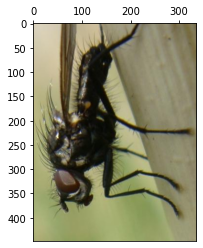

In [7]:
img = cv2.imread(image_path)
# OpenCV interprets images in Blue-Green-Red (BGR), while matplotlib interprets images as Red-Green-Blue (RGB).
# Convert the image to RGB so that matplotlib can render the image correctly.
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
fig, ax = plt.subplots()
ax.xaxis.tick_top()
ax.imshow(img)

The same image read above with OpenCV (opencv-python) and here with PIL - you can see the flip difference already when plotting the image again based on PIL reads.

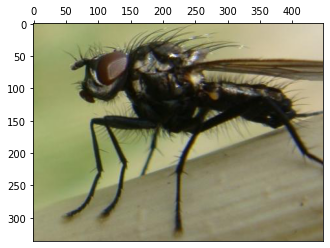

In [8]:
img_pil = Image.open(image_path) # Image from PIL
fig, ax = plt.subplots()
ax.xaxis.tick_top()
ax.imshow(img_pil) # same as ax.imshow(np.asarray(img_pil)) 

Note that `.shape` from `cv2` reports first height then width, while `.size` from `PIL` reports first width then height.

In [9]:
# OpenCV Height, Width seems to be rotated already, like VGG VIA
# .shape returns a tuple of number of rows, columns 
# https://docs.opencv.org/3.0-beta/doc/py_tutorials/py_core/py_basic_ops/py_basic_ops.html#accessing-image-properties
img.shape[0:2] # OpenCV reports first Height then Width

(448, 336)

In [10]:
# PIL .size returns "Image size, in pixels. The size is given as a 2-tuple (width, height)."
# https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.size
print(img_pil.size) # PIL reports first Width then Height
print(img_pil.width) # to double check
print(img_pil.height)

(448, 336)
448
336
